In [179]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from collections import defaultdict as dt

In [299]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [300]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_train.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (60000,)


In [182]:
def plotImage(data,label):
    fig,ax=plt.subplots(2,5,figsize=(8,8))
    for i in range(len(ax)):
        for j in range(len(ax[0])):
            image=np.reshape(data[len(ax[1])*i+j],(28,28))
            ax[i][j].set_title("Label : {}".format(label[len(ax[1])*i+j]))
            ax[i][j].imshow(image,cmap='gray')
            ax[i][j].axis("off")
    plt.show()

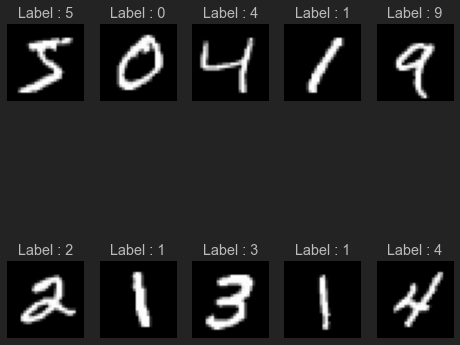

In [183]:
plotImage(X_train[:10,:,:],Y_train[:10])

In [301]:
X_t=X_train.reshape((X_train.shape[0],-1))
X_t=X_t.astype(float)/255.
print(X_t.shape)

(60000, 784)


In [302]:
x_test=X_test.reshape((X_test.shape[0],-1))
x_test=x_test.astype(float)/255.
print(x_test.shape)

(10000, 784)


In [303]:
from sklearn.cluster import MiniBatchKMeans

In [304]:
n_cluster=len(np.unique(Y_train))

kmeans=MiniBatchKMeans(n_clusters=n_cluster)
kmeans.fit(X_t)


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [323]:
def cluster_label(kmeans,actual_label):
    
    cluster_labels = dt(list)
    labels=kmeans.labels_
    for i in range(kmeans.n_clusters):
        index=np.where(labels == i)
        label=[]
        label.append(actual_label[index])
        
        if len(label[0]) == 1:
            count = np.bincount(label[0])
        else:
            count = np.bincount(np.squeeze(label))
        
        cluster_labels[np.argmax(count)].append(i)
        
    return cluster_labels   
    


In [324]:
print(cluster_label(kmeans,Y_train))

defaultdict(<class 'list'>, {1: [0, 2], 9: [1], 6: [3, 8], 7: [4], 0: [5], 3: [6], 2: [7], 8: [9]})


In [281]:
def predict_digit(predicted_cluster,d):
    predict_label=np.zeros(len(predicted_cluster)).astype(np.uint8)
    for i,cluster in enumerate(predicted_cluster):
        for key,val in d.items():
            if cluster in val:
                predict_label[i]=key
    return predict_label

In [282]:
def accuracy(actual,predicted):
    print(f"Accuracy is : {(np.sum(actual==predicted)/actual.shape[0])*100:.3f}")

In [222]:
clusters_dict=cluster_label(kmeans,Y_train)
predicted_cluster=kmeans.predict(X_t)
predict=predict_digit(predicted_cluster,clusters_dict)
print("On train set : ")
accuracy(Y_train,predict)

On train set : 
Accuracy is : 48.403


In [204]:
predicted_cluster_test=kmeans.predict(x_test)
predict_test=predict_digit(predicted_cluster_test,clusters_dict)
print("On test set : ")
accuracy(Y_test,predict_test)

On test set : 
Accuracy is : 58.750


### what happens when we increase the clusters

In [326]:
clusters=[10,16,36,64,144,256]
for cluster in clusters:
    kmeans=MiniBatchKMeans(n_clusters=cluster)
    kmeans.fit(X_t)
    cluster_dict=cluster_label(kmeans,Y_train)
    predict=predict_digit(kmeans.labels_,cluster_dict)
    print("Accuracy on cluster {}".format(cluster))
    accuracy(Y_train,predict)
    print()


Accuracy on cluster 10
Accuracy is : 57.452

Accuracy on cluster 16
Accuracy is : 63.662

Accuracy on cluster 36
Accuracy is : 74.667

Accuracy on cluster 64
Accuracy is : 80.020

Accuracy on cluster 144
Accuracy is : 87.528

Accuracy on cluster 256
Accuracy is : 89.752



In [327]:
kmeans=MiniBatchKMeans(n_clusters=256)
kmeans.fit(X_t)
cluster_dict=cluster_label(kmeans,Y_train)
predicted_clusters=kmeans.predict(x_test)
predict=predict_digit(predicted_clusters,cluster_dict)
print("Accuracy on cluster {}".format(cluster))
accuracy(Y_test,predict)


Accuracy on cluster 256
Accuracy is : 90.470


In [328]:
print(predict[:30])
print(Y_test[:30])

[7 2 1 0 9 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [372]:
def plotImage(data,label,actual,row=5,col=5):
    fig,ax=plt.subplots(row,col,figsize=(15,15))
    for i in range(len(ax)):
        for j in range(len(ax[0])):
            image=np.reshape(data[len(ax[1])*i+j],(28,28))
            ax[i][j].set_title("predicted : {}".format(label[len(ax[1])*i+j]))
            if label[len(ax[1])*i+j]!=actual[len(ax[1])*i+j]:
                ax[i][j].plot(7.5,4.75,marker='o',c='red')
            ax[i][j].imshow(image,cmap='gray')
            ax[i][j].axis("off")
    plt.show()

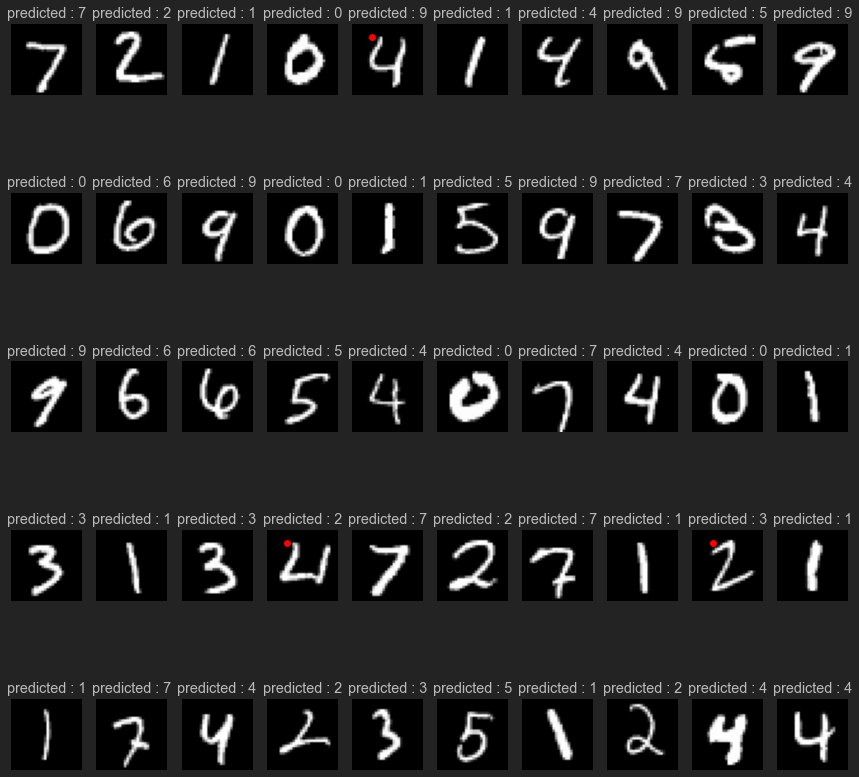

In [373]:
plotImage(X_test[:50,:,:],predict[:50],Y_test[:50],5,10)